# Brain Tumor Detector

## Get and Load Dataset and Helper Functions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/

/content/drive/MyDrive/Colab Notebooks/Deep Learning


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Deep Learning/cnn_helper')

import cnn_helper as hp

## Load Dependencies

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, Sequential
import keras
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns


In [5]:
train_ds, val_ds = hp.prepare_train_and_val_datasets()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


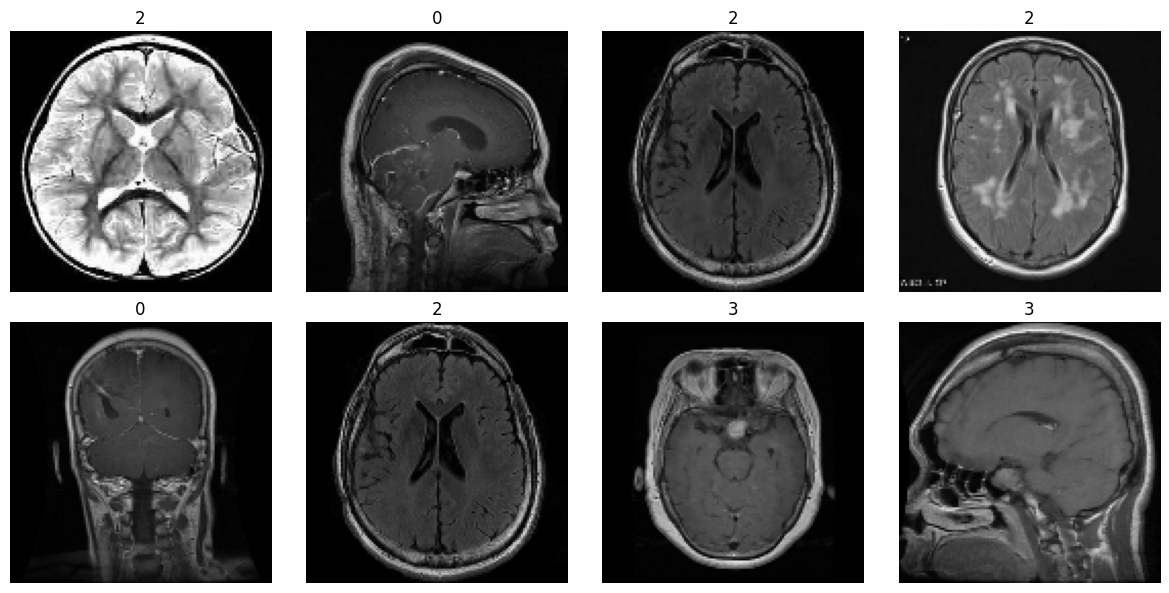

In [ ]:
plt.figure(figsize=(12, 6))

for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.tight_layout()

In [7]:
for images, labels in train_ds.take(1):
  shape = images.shape

In [8]:
shape


TensorShape([32, 128, 128, 3])

In [9]:
INPUT_SHAPE = shape[1:]

### Baseline CNN:

In [ ]:
model = hp.create_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
history = model.fit(train_ds, epochs=50, validation_data = val_ds, callbacks=[early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.4005 - loss: 157.8652 - val_accuracy: 0.6778 - val_loss: 0.9769
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.6135 - loss: 0.9865 - val_accuracy: 0.7688 - val_loss: 0.7337
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7044 - loss: 0.7911 - val_accuracy: 0.7933 - val_loss: 0.6592
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.7516 - loss: 0.6697 - val_accuracy: 0.7968 - val_loss: 0.6079
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.7723 - loss: 0.6151 - val_accuracy: 0.8205 - val_loss: 0.5522
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7856 - loss: 0.5557 - val_accuracy: 0.8257 - val_loss: 0.5039
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8051 - loss: 0.5436 - val_accuracy: 0.8415 - val_loss: 0.5082
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8095 - loss: 0.4993 -

In [ ]:
test_labels, predictions = eval_model_on_test(model)

Found 1311 files belonging to 4 classes.


Predicting on Test Data:   0%|          | 0/11 [00:00<?, ?it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 


Predicting on Test Data:   9%|▉         | 1/11 [00:00<00:08,  1.11it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Predicting on Test Data:  18%|█▊        | 2/11 [00:01<00:04,  1.96it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Predicting on Test Data:  27%|██▋       | 3/11 [00:01<00:02,  2.75it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Predicting on Test Data:  36%|███▋      | 4/11 [00:01<00:02,  3.30it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Predicting on Test Data:  45%|████▌     | 5/11 [00:01<00:01,  3.76it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Predicting on Test Data:  55%|█████▍    | 6/11 [00:01<00:01,  4.53it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Predicting on Test Data:  64%|██████▎   | 7/11 [00:02<00:00,  5.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Predicting on Test Data:  73%|███████▎  | 8/11 [00:02<00:00,  5.60it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Predicting on Test Data:  82%|████████▏ | 9/11 [00:02<00:00,  6.19it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Predicting on Test Data:  91%|█████████ | 10/11 [00:02<00:00,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Predicting on Test Data: 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


In [ ]:
pred_labels = np.argmax(predictions, axis=1)

In [ ]:
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(classification_report(test_labels, pred_labels, target_names=classes))


              precision    recall  f1-score   support

      glioma       0.88      0.84      0.86       300
  meningioma       0.84      0.76      0.80       306
     notumor       0.94      0.99      0.96       405
   pituitary       0.91      0.98      0.94       300

    accuracy                           0.90      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.90      0.90      0.90      1311



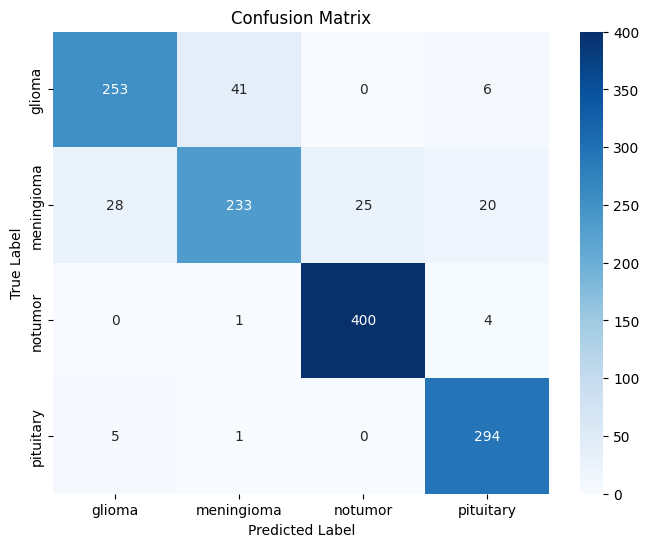

In [ ]:
plot_cm(test_labels, pred_labels)

### Image Augmentation

In [10]:
train_ds_aug = (train_ds.map(lambda image, label: (tf.image.random_brightness(image, max_delta=0.2), label))
                        .map(lambda image, label: (tf.image.random_flip_left_right(image), label))
                        .map(lambda image, label: (tf.image.random_contrast(image, lower=0.2, upper=1.5), label))
                        .shuffle(2000)
                        .prefetch(buffer_size=tf.data.AUTOTUNE))


In [11]:
val_ds_aug = (val_ds.map(lambda image, label: (tf.image.random_brightness(image, max_delta=0.2),label))
                    .map(lambda image, label: (tf.image.random_flip_left_right(image), label))
                    .map(lambda image, label: (tf.image.random_contrast(image, lower=0.2, upper=1.5), label))
                    .shuffle(2000)
                    .prefetch(buffer_size=tf.data.AUTOTUNE))

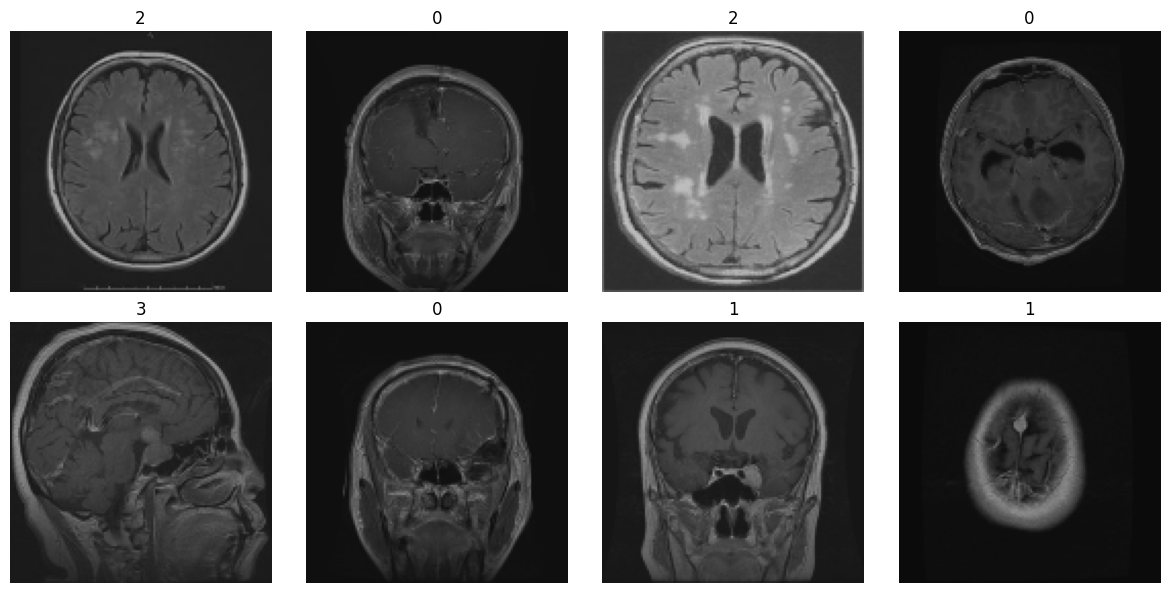

In [ ]:
plt.figure(figsize=(12, 6))

for images, labels in train_ds_aug.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.tight_layout()

In [ ]:
model = hp.create_model()
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
history = model.fit(train_ds_aug, epochs=100, validation_data = val_ds_aug, callbacks=[early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.3061 - loss: 136.7667 - val_accuracy: 0.4422 - val_loss: 1.3008
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4374 - loss: 1.2352 - val_accuracy: 0.4851 - val_loss: 1.2162
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5070 - loss: 1.1556 - val_accuracy: 0.4851 - val_loss: 1.1871
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5075 - loss: 1.1202 - val_accuracy: 0.5779 - val_loss: 1.0189
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5725 - loss: 0.9880 - val_accuracy: 0.6629 - val_loss: 0.9032
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6117 - loss: 0.9076 - val_accuracy: 0.7110 - val_loss: 0.7929
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6131 - loss: 0.9380 - val_accuracy: 0.7224 - val_loss: 0.7695
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6370 - loss: 0.898

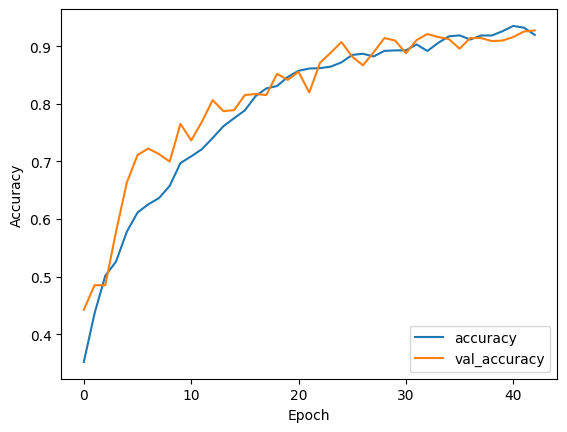

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right');

In [ ]:
test_labels, predictions = eval_model_on_test(model)
pred_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred_labels, target_names=classes))

Found 1311 files belonging to 4 classes.


Predicting on Test Data:   0%|          | 0/11 [00:00<?, ?it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


Predicting on Test Data:   9%|▉         | 1/11 [00:03<00:31,  3.10s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Predicting on Test Data:  18%|█▊        | 2/11 [00:03<00:12,  1.43s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Predicting on Test Data:  27%|██▋       | 3/11 [00:03<00:07,  1.10it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Predicting on Test Data:  36%|███▋      | 4/11 [00:03<00:04,  1.47it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Predicting on Test Data:  45%|████▌     | 5/11 [00:04<00:03,  1.61it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step 


Predicting on Test Data:  55%|█████▍    | 6/11 [00:05<00:03,  1.58it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Predicting on Test Data:  64%|██████▎   | 7/11 [00:05<00:02,  1.81it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Predicting on Test Data:  73%|███████▎  | 8/11 [00:05<00:01,  2.15it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Predicting on Test Data:  82%|████████▏ | 9/11 [00:08<00:02,  1.06s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Predicting on Test Data:  91%|█████████ | 10/11 [00:08<00:00,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Predicting on Test Data: 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]

              precision    recall  f1-score   support

      glioma       0.94      0.85      0.89       300
  meningioma       0.86      0.89      0.87       306
     notumor       0.96      0.99      0.97       405
   pituitary       0.97      1.00      0.99       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.93      0.93      0.93      1311



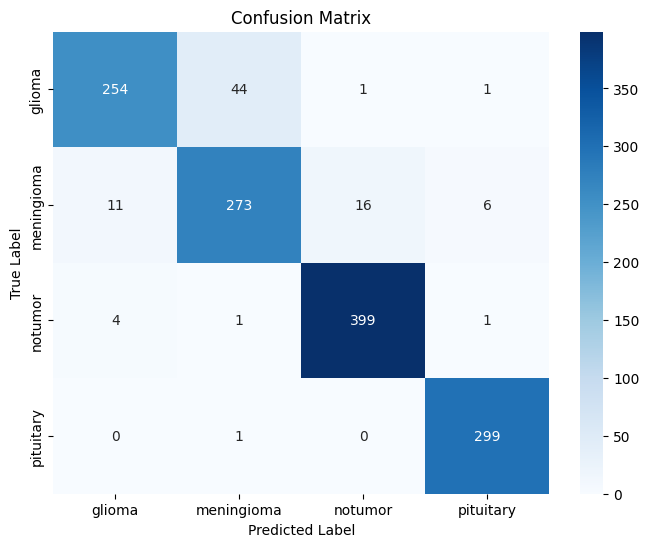

In [ ]:
hp.plot_cm(test_labels, pred_labels)

Trying VGG model

In [ ]:
# Load a new instance of the VGG19 model.
model = tf.keras.applications.VGG19(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet')

# Points to the last layer to ignore the top layer.
last_conv_layer = model.get_layer('block5_conv4')  # Last convolutional layer of VGG19

conv_model = Model(inputs=model.input,
                   outputs=last_conv_layer.output)

# Start a new Keras Sequential model.
model_vgg = Sequential()

# Add the convolutional part of the model from above.
model_vgg.add(conv_model)

# Add a global average pooling layer.
model_vgg.add(tf.keras.layers.GlobalAveragePooling2D())
model_vgg.add(layers.Dropout(0.4))  # Add a Dropout layer before the output layer

# Add a final dense layer for predictions.
model_vgg.add(tf.keras.layers.Dense(4, activation='softmax'))

# Compile the model (don't forget this step)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can proceed with data preparation and training the model

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_vgg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_36 (Functional)           │ (None, 8, 8, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,026,436 (76.39 MB)

 Trainable params: 20,026,436 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-4)
loss = 'sparse_categorical_crossentropy'
lst_metrics = ['sparse_categorical_accuracy']

In [ ]:
# Initially freeze all layers
for layer in conv_model.layers:
    layer.trainable = False


In [ ]:
hp.print_layer_trainable(conv_model)

trainable : layer name
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
False:	input_layer_3
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_conv4
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_conv4
False:	block4_pool
False:	block5_conv1
False:	block5_conv2
False:	block5_conv3
False:	block5_conv4


In [19]:
tf.config.run_functions_eagerly(True)

In [18]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
ES = EarlyStopping(monitor = 'val_loss',min_delta = 0.001,patience = 5,mode = 'min',restore_best_weights = True,verbose = 1)

RL = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.3,patience = 5,verbose = 1,mode = 'min')
callbacks = [ES,RL]


In [ ]:
model_vgg.compile(optimizer=optimizer, loss=loss, metrics=lst_metrics)
epochs = 50

history = model_vgg.fit(train_ds_aug,
                        epochs=epochs,
                        validation_data=val_ds_aug,
                        callbacks = callbacks
                        )

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - loss: 1.8829 - sparse_categorical_accuracy: 0.4093 - val_loss: 1.0729 - val_sparse_categorical_accuracy: 0.5788 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - loss: 1.6153 - sparse_categorical_accuracy: 0.4502 - val_loss: 1.0320 - val_sparse_categorical_accuracy: 0.6138 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 617ms/step - loss: 1.4628 - sparse_categorical_accuracy: 0.4946 - val_loss: 0.9417 - val_sparse_categorical_accuracy: 0.6419 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 92s 263ms/step - loss: 1.3544 - sparse_categorical_accuracy: 0.5322 - val_loss: 0.8871 - val_sparse_categorical_accuracy: 0.6778 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 83s 270ms/step - loss: 1.2784 - sparse_categorical_accuracy: 0.5630 - val_loss: 0.8530 - val_sparse_categorical_accuracy: 0.6979 - learning_rate: 1.0000e-04
Epoch 6/50
143/

Try and open up VGG layers for training:

In [ ]:
# Load a new instance of the VGG19 model.
model = tf.keras.applications.VGG19(
    input_shape=(128,128,3),
    include_top=False,
    weights='imagenet')

# Points to the last layer to ignore the top layer.
last_conv_layer = model.get_layer('block5_conv4')  # Last convolutional layer of VGG19

conv_model = Model(inputs=model.input,
                   outputs=last_conv_layer.output)

# Start a new Keras Sequential model.
model_vgg = Sequential()

# Add the convolutional part of the model from above.
model_vgg.add(conv_model)

# Add a global average pooling layer.
model_vgg.add(tf.keras.layers.GlobalAveragePooling2D())
model_vgg.add(layers.Dropout(0.4))  # Add a Dropout layer before the output layer

# Add a final dense layer for predictions.
model_vgg.add(tf.keras.layers.Dense(4, activation='softmax'))

# Compile the model (don't forget this step)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can proceed with data preparation and training the model

In [ ]:
# Initially freeze all layers
for layer in conv_model.layers:
    layer.trainable = False

# Unfreeze layers containing 'block5'
for layer in conv_model.layers:
    if 'block5' in layer.name:
        layer.trainable = True

In [ ]:
hp.print_layer_trainable(conv_model)

trainable : layer name
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
False:	input_layer_5
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_conv4
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_conv4
False:	block4_pool
True:	block5_conv1
True:	block5_conv2
True:	block5_conv3
True:	block5_conv4


In [ ]:
optimizer = Adam(learning_rate=1e-4)
loss = 'sparse_categorical_crossentropy'
lst_metrics = ['sparse_categorical_accuracy']

In [ ]:
model_vgg.compile(optimizer=optimizer, loss=loss, metrics=lst_metrics)
epochs = 50

history = model_vgg.fit(train_ds_aug,
                        epochs=epochs,
                        validation_data=val_ds_aug,
                        callbacks = callbacks
                        )

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 63s 345ms/step - loss: 0.9730 - sparse_categorical_accuracy: 0.6477 - val_loss: 0.3305 - val_sparse_categorical_accuracy: 0.8958 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - loss: 0.4045 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.2464 - val_sparse_categorical_accuracy: 0.9247 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.2285 - sparse_categorical_accuracy: 0.9189 - val_loss: 0.2966 - val_sparse_categorical_accuracy: 0.9256 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 42s 254ms/step - loss: 0.2008 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1968 - val_sparse_categorical_accuracy: 0.9431 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9613 - val_loss: 0.3005 - val_sparse_categorical_accuracy: 0.9387 - learning_rate: 1.0000e-04
Epoch 6/50
143/

In [ ]:
# Save the entire model as a `.keras` zip archive.
model_vgg.save('model_vgg.keras')

In [ ]:
test_labels, predictions = eval_model_on_test(model_vgg)
pred_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred_labels, target_names=classes))

Found 1311 files belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
Predicting on Test Data:   0%|          | 0/11 [00:00<?, ?it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Predicting on Test Data:   9%|▉         | 1/11 [00:00<00:09,  1.01it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Predicting on Test Data:  18%|█▊        | 2/11 [00:01<00:05,  1.55it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Predicting on Test Data:  27%|██▋       | 3/11 [00:01<00:04,  1.88it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Predicting on Test Data:  36%|███▋      | 4/11 [00:02<00:03,  2.05it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Predicting on Test Data:  45%|████▌     | 5/11 [00:02<00:02,  2.17it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Predicting on Test Data:  55%|█████▍    | 6/11 [00:03<00:02,  2.29it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Predicting on Test Data:  64%|██████▎   | 7/11 [00:03<00:01,  2.38it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Predicting on Test Data:  73%|███████▎  | 8/11 [00:04<00:01,  1.95it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Predicting on Test Data:  82%|████████▏ | 9/11 [00:04<00:01,  1.70it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Predicting on Test Data:  91%|█████████ | 10/11 [00:05<00:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Predicting on Test Data: 100%|██████████| 11/11 [00:10<00:00,  1.07it/s]

              precision    recall  f1-score   support

      glioma       0.98      0.96      0.97       300
  meningioma       0.96      0.95      0.95       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.98      0.99      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



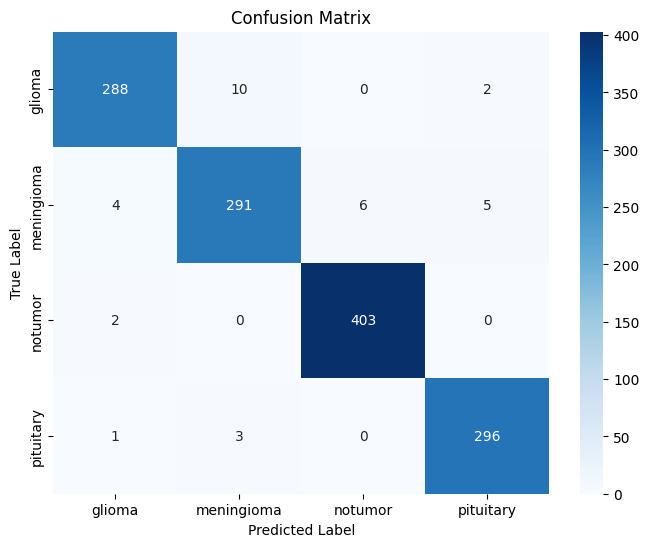

In [ ]:
hp.plot_cm(test_labels, pred_labels)